# The_Brobs Ex 3 
### Lucia Depaoli
### Alessandro Fella
### Lorenzo Mandolito
### Simone Mistrali

## How to properly compile this project
First of all you need to compile the part one, after that you have to compile all the appendix, in order to have all the variables that is needed to the plots then the part two,three and four. 

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
import seaborn
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers
trace_adam_l1 = np.zeros(6)
trace_sgd_l1  = np.zeros(6)
trace_adam_l2 = np.zeros(6)
trace_sgd_l2  = np.zeros(6)

Function used to create the NN.

In [ ]:
def create_model(regularizer, initializer, activation='relu',optimizer='adam'):
# create model
    model = Sequential()
    model.add(Conv1D( filters = 5, kernel_size = 11,
                 kernel_regularizer = regularizer,
                 kernel_initializer = initializer,
                 activation = activation,
                 input_shape = input_shape
                ))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters = 3, kernel_size = 7, activation = activation))
    model.add(Flatten())
    model.add(Dense(10, activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(N_categ, activation = 'softmax' ))
    
    print(model.summary())

# compile model
    model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = optimizer, metrics = ['accuracy'])
    
    return model

Here we use the data we have produced in the theoretical lesson, with $L=60$, $Z=12$, $A=500$, $DX=50$, $bias=5$.

In [ ]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000'
fnamex = 'DATA2/x_' + str0 + '.csv' 
fnamey = 'DATA2/y_' + str0 + '.csv'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis = 1)
for n in range(N):
    x[n] = x[n] - xm[n]
    
xstd = x.std(axis = 1)
for n in range(N):
    x[n] = x[n] / xstd[n]
    
categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


### DATA reshaping

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


## Convolutional NN - preliminary analysis
Here we have created $4$ different model with different regularizations and optimizers.

ADAM with regularizer L1.

In [ ]:
regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L1_50 = np.array((fit.history["accuracy"],
                       fit.history['val_' + "accuracy"],
                       fit.history["loss"], fit.history['val_' + "loss"]))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

SGD with regularizer L1.

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L1_50 = np.array((fit1.history["accuracy"],
                      fit1.history['val_' + "accuracy"],
                      fit1.history["loss"], fit1.history['val_' + "loss"]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

### Regularizer L2
We have decided to try also with a different regularizer.

Adam with regularizer L2.

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L2_50 = np.array((fit3.history["accuracy"],
                       fit3.history['val_' + "accuracy"],
                       fit3.history["loss"], fit3.history['val_' + "loss"]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_2 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

SGD with regularizer L2.

In [ ]:
np.random.seed(12345)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L2_50 = np.array((fit4.history["accuracy"],
                      fit4.history['val_' + "accuracy"],
                      fit4.history["loss"], fit4.history['val_' + "loss"]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_3 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_3 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

Now we show the confusion matrix of all the $4$ models we have defined before.

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


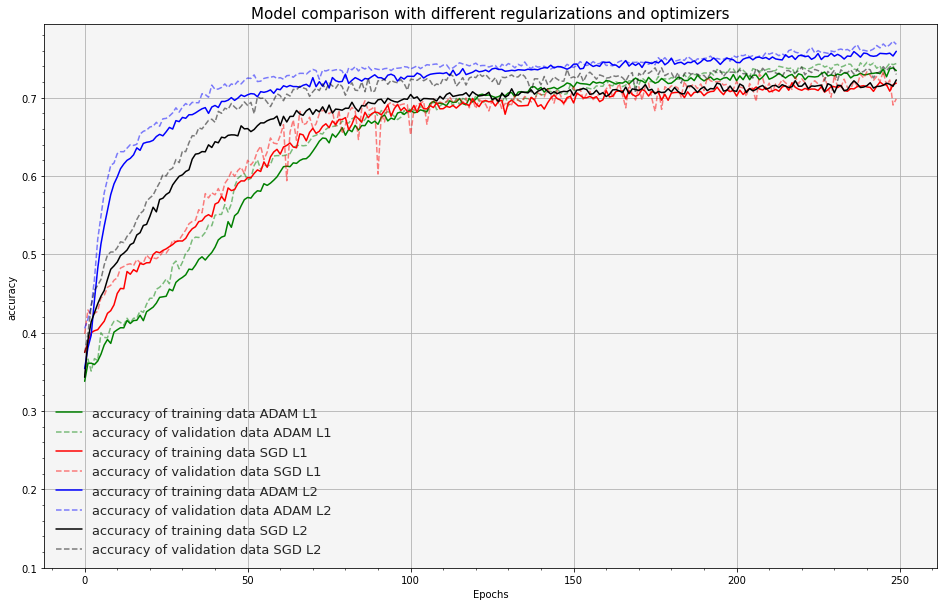

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


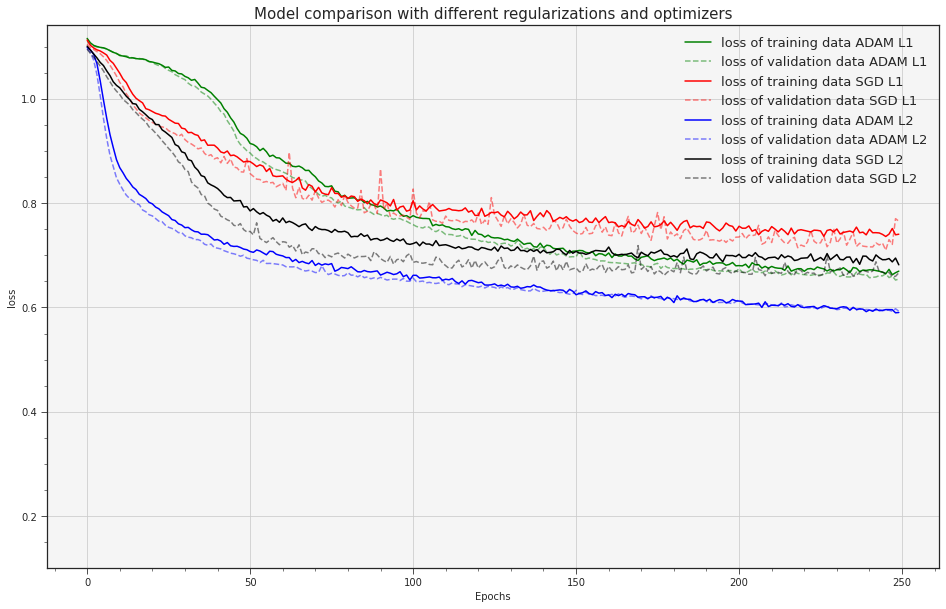

In [ ]:
for i in range(0,4,2):
    name = ['accuracy', 'nan', 'loss', 'nan']
    plt.figure(figsize=(16,10))
    plt.xticks()
    plt.minorticks_on()
    plt.style.use('seaborn-ticks')
    ax = plt.axes()
    ax.set_facecolor("whitesmoke")
    plt.grid()

    plt.plot(ADAM_L1_50[i], 'g', label = name[i] +' of training data ADAM L1')
    plt.plot(ADAM_L1_50[i+1], 'g--', label = name[i] + ' of validation data ADAM L1', alpha=0.5)
    
    plt.plot(SGD_L1_50[i], 'r', label = name[i] +' of training data SGD L1')
    plt.plot(SGD_L1_50[i+1], 'r--', label = name[i] + ' of validation data SGD L1', alpha=0.5)
    
    plt.plot(ADAM_L2_50[i], 'b', label = name[i] +' of training data ADAM L2')
    plt.plot(ADAM_L2_50[i+1], 'b--', label = name[i] + ' of validation data ADAM L2', alpha=0.5)
    
    plt.plot(SGD_L2_50[i], 'k', label = name[i] +' of training data SGD L2')
    plt.plot(SGD_L2_50[i+1], 'k--', label = name[i] + ' of validation data SGD L2', alpha=0.5)
    
    plt.title('Model comparison with different regularizations and optimizers', fontsize=15)
    plt.ylabel(name[i])
    plt.xlabel('Epochs')
    plt.ylim(ymin=0.1)
    plt.legend(fontsize=13,loc='best')
    plt.show()

## 1) Confusion matrix

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


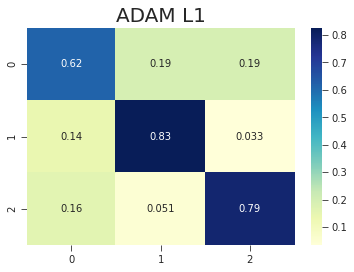

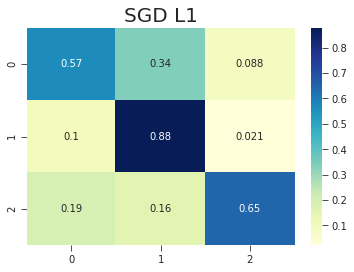

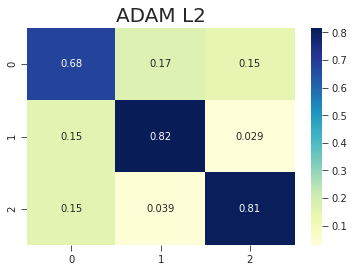

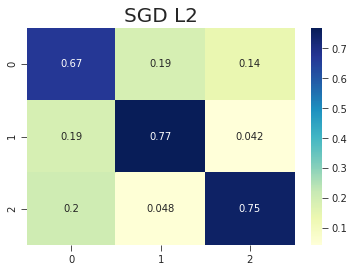

In [ ]:
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix

y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()


Let's see the trace of our confusion matrix to identify the best model.

In [ ]:
print('ADAM L1 ',confusion_matrix.trace())
print('SGD L1 ',confusion_matrix1.trace())
print('ADAM L2 ',confusion_matrix3.trace())
print('SGD L2 ',confusion_matrix4.trace())
trace_adam_l1[0] = confusion_matrix.trace()
trace_sgd_l1[0]  = confusion_matrix1.trace()
trace_adam_l2[0] = confusion_matrix3.trace()
trace_sgd_l2[0]  = confusion_matrix4.trace()


ADAM L1  2.230623427025226
SGD L1  2.0957696827262047
ADAM L2  2.30407318863091
SGD L2  2.188558873716295


The best algorithm is Adam with regularizer L2.

## 2) Different A/DX
We have created model for different $A/DX$, with $A=500$ fixed and $DX$ from $50$ to $70$. We have noticed that the network starts to fail discriminating the categories at around $DX=60$: here the trace of the confusion matrix normalized is less than $0.60$.

All the models are in the appendix. To run this part, first run the appendix part 2.

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


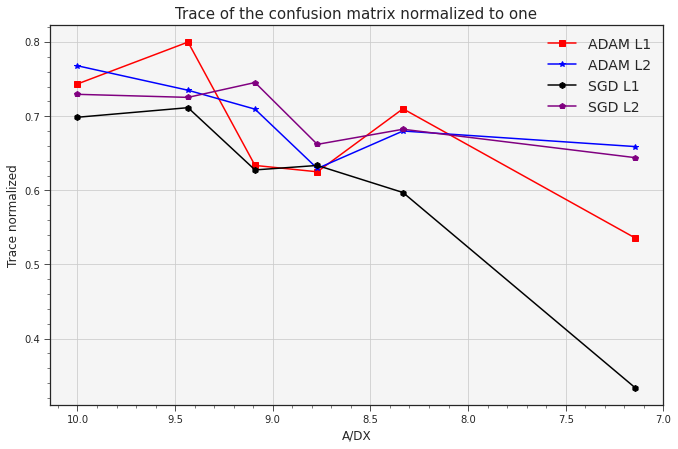

In [ ]:
noiseratio = np.array([500/50,500/53,500/55,500/57,500/60,500/70])
plt.style.use('seaborn-ticks')

plt.figure(figsize=(11,7))
plt.plot(noiseratio,trace_adam_l1/3,'r',label="ADAM L1",marker='s')
plt.plot(noiseratio,trace_adam_l2/3,'b',label="ADAM L2",marker='*')
plt.plot(noiseratio,trace_sgd_l1/3,'k',label="SGD L1",marker='h')
plt.plot(noiseratio,trace_sgd_l2/3,'purple',label="SGD L2",marker='p') 
plt.legend(fontsize=14,loc='best')
plt.minorticks_on()
plt.gca().invert_xaxis()

ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.xlabel('A/DX', fontsize=12)
plt.ylabel('Trace normalized', fontsize=12)
plt.grid()
plt.title("Trace of the confusion matrix normalized to one",fontsize=15)
plt.show()

## 3) Different CNN
Analysis of different CNN to check the scaling of the number of parameters adding Dense or Conv1D layer.

In [ ]:
str0 = 'ts_comp_N10000'
fnamex = 'DATA2/x_' + str0 + '.csv'
fnamey = 'DATA2/y_' + str0 + '.csv'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n]
    
xstd = x.std(axis = 1)
for n in range(N):
    x[n] = x[n] / xstd[n]

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


### DATA reshaping

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


### Convolutional NN

Adam with regularizer L1. This is the standard model, with $2$ Conv1D layers.

In [ ]:
regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)
opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

PARAM_331 = np.array((fit.history["accuracy"],
                      fit.history['val_' + "accuracy"],
                      fit.history["loss"], fit.history['val_' + "loss"]))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_24 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_24 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_24 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 3)               

Let's create another CNN with just one convolutional layer.

In [ ]:
model1 = Sequential()
model1.add(Conv1D( filters = 5, kernel_size = 11,
             kernel_regularizer = regl1,
             kernel_initializer = ini,
             activation = 'relu',
             input_shape = input_shape
            ))
model1.add(AveragePooling1D(5))
model1.add(Flatten())
model1.add(Dense(10, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(N_categ, activation = 'softmax' ))
    
print(model1.summary())

# compile model
model1.compile(loss = keras.losses.categorical_crossentropy,
optimizer = 'adam', metrics = ['accuracy'])

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

PARAM_603 = np.array((fit1.history["accuracy"],
                      fit1.history['val_' + "accuracy"],
                      fit1.history["loss"], fit1.history['val_' + "loss"]))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_50 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_25 (Averag (None, 10, 5)             0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                510       
_________________________________________________________________
dropout_25 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 3)                 33        
Total params: 603
Trainable params: 603
Non-trainable params: 0
_______________________________________________________

The next models have different Dense layers.

In [ ]:
model2 = Sequential()
model2.add(Conv1D( filters = 5, kernel_size = 11,
             kernel_regularizer = regl1,
             kernel_initializer = ini,
             activation = 'relu',
             input_shape = input_shape
            ))
model2.add(AveragePooling1D(5))
model2.add(Flatten())
model2.add(Dense(5, activation = 'relu'))
model2.add(Dense(4, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(N_categ, activation = 'softmax' ))
    
print(model2.summary())

model2.compile(loss = keras.losses.categorical_crossentropy,
optimizer = 'adam', metrics = ['accuracy'])

fit2 = model2.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

PARAM_354 = np.array((fit2.history["accuracy"],
                      fit2.history['val_' + "accuracy"],
                      fit2.history["loss"], fit2.history['val_' + "loss"]))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_51 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_26 (Averag (None, 10, 5)             0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 24        
_________________________________________________________________
dropout_26 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_54 (Dense)             (None, 3)               

In [ ]:
model3 = Sequential()
model3.add(Conv1D( filters = 5, kernel_size = 11,
             kernel_regularizer = regl1,
             kernel_initializer = ini,
             activation = 'relu',
             input_shape = input_shape
            ))
model3.add(AveragePooling1D(5))
model3.add(Flatten())
model3.add(Dense(7, activation = 'relu'))
model3.add(Dense(7, activation = 'relu'))
model3.add(Dense(6, activation = 'relu'))
model3.add(Dense(5, activation = 'relu'))
model3.add(Dense(4, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(N_categ, activation = 'softmax' ))
    
print(model3.summary())

model3.compile(loss = keras.losses.categorical_crossentropy,
optimizer = 'adam', metrics = ['accuracy'])

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

PARAM_595 = np.array((fit3.history["accuracy"],
                      fit3.history['val_' + "accuracy"],
                      fit3.history["loss"], fit3.history['val_' + "loss"]))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_52 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_27 (Averag (None, 10, 5)             0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 7)                 357       
_________________________________________________________________
dense_56 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_57 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_58 (Dense)             (None, 5)               

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


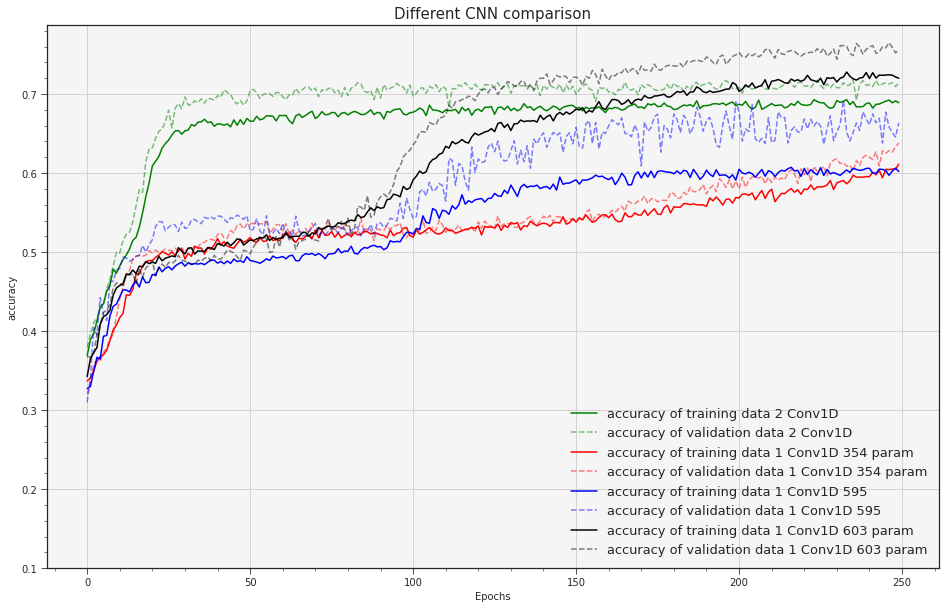

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


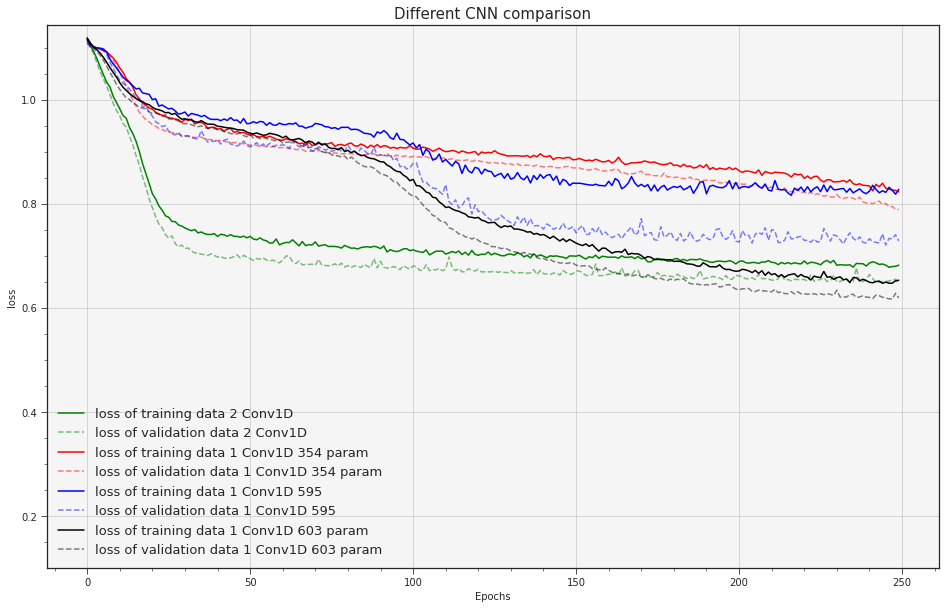

In [ ]:
for i in range(0,4,2):
    name = ['accuracy', 'nan', 'loss', 'nan']
    plt.figure(figsize=(16,10))
    plt.xticks()
    plt.minorticks_on()
    plt.style.use('seaborn-ticks')
    ax = plt.axes()
    ax.set_facecolor("whitesmoke")
    plt.grid()

    plt.plot(PARAM_331[i], 'g', label = name[i] +' of training data 2 Conv1D')
    plt.plot(PARAM_331[i+1], 'g--', label = name[i] + ' of validation data 2 Conv1D', alpha=0.5)
    
    plt.plot(PARAM_354[i], 'r', label = name[i] +' of training data 1 Conv1D 354 param')
    plt.plot(PARAM_354[i+1], 'r--', label = name[i] + ' of validation data 1 Conv1D 354 param', alpha=0.5)
    
    plt.plot(PARAM_595[i], 'b', label = name[i] +' of training data 1 Conv1D 595')
    plt.plot(PARAM_595[i+1], 'b--', label = name[i] + ' of validation data 1 Conv1D 595', alpha=0.5)
    
    plt.plot(PARAM_603[i], 'k', label = name[i] +' of training data 1 Conv1D 603 param')
    plt.plot(PARAM_603[i+1], 'k--', label = name[i] + ' of validation data 1 Conv1D 603 param', alpha=0.5)

    plt.title('Different CNN comparison', fontsize=15)
    plt.ylabel(name[i])
    plt.xlabel('Epochs')
    plt.ylim(ymin=0.1)
    plt.legend(fontsize=13,loc='best')
    plt.show()

Adding Conv1D layer the number of parameters decreases, while adding Dense layer such number increases.

The speed of this variation in the number of parameters, in the case of the Dense layer, depends on the parameter neurons, which is the size of the output space.

We have tried $3$ different models (with just one Conv1D layer) plus the original one (with two Conv1D layers). Each model has different Dense layer inside and so different number of trainable parameters. On the accuracy side, the best model is the one equals to the original one but without a convolutional layer. On the loss side, the best model is the original one. 

## 4) Different $\lambda$ value and visualization of weights
All the models are stored in the appendix part 4. For running this part, run before appendix part 4.

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


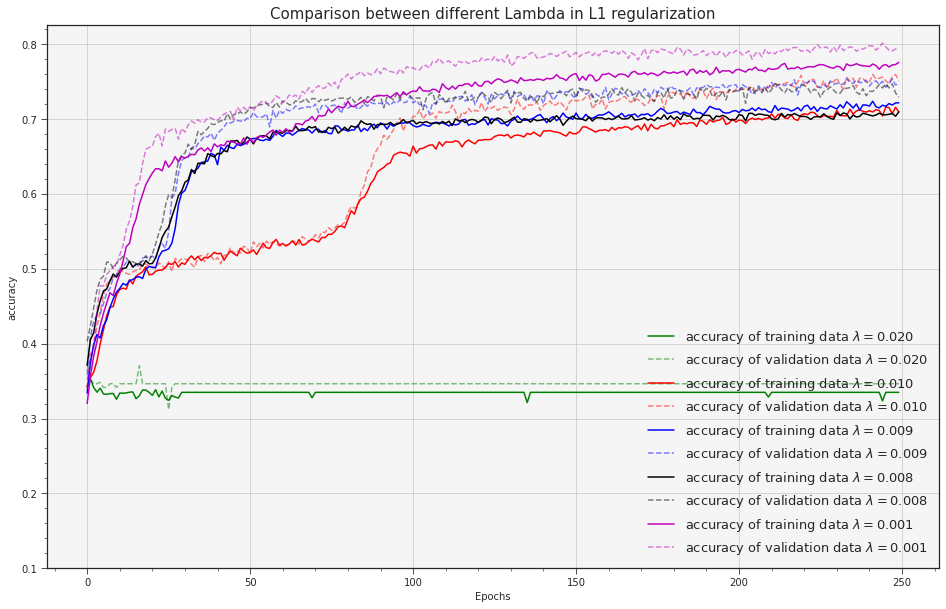

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


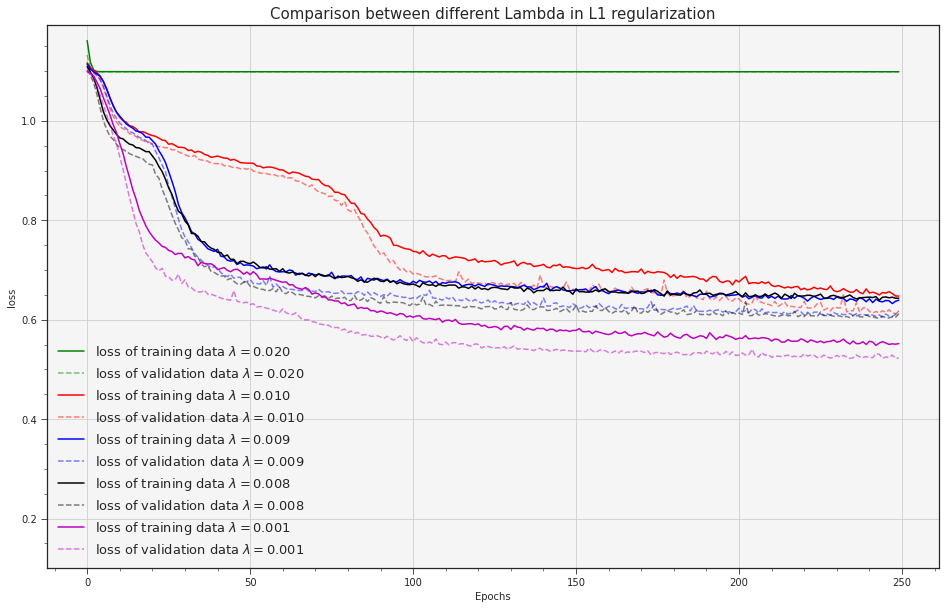

In [ ]:
for i in range(0,4,2):
    name=['accuracy','nan','loss','nan']
    plt.figure(figsize=(16,10))
    plt.xticks()
    plt.minorticks_on()
    plt.style.use('seaborn-ticks')
    ax = plt.axes()
    ax.set_facecolor("whitesmoke")
    plt.grid()

    plt.plot(REG_L1_0020[i], 'g', label = name[i] +' of training data $\lambda=0.020$')
    plt.plot(REG_L1_0020[i+1], 'g--', label = name[i] + ' of validation data $\lambda=0.020$', alpha=0.5)
    
    plt.plot(REG_L1_0010[i], 'r', label = name[i] +' of training data $\lambda=0.010$')
    plt.plot(REG_L1_0010[i+1], 'r--', label = name[i] + ' of validation data $\lambda=0.010$', alpha=0.5)
    
    plt.plot(REG_L1_0009[i], 'b', label = name[i] +' of training data $\lambda=0.009$')
    plt.plot(REG_L1_0009[i+1], 'b--', label = name[i] + ' of validation data $\lambda=0.009$', alpha=0.5)
    
    plt.plot(REG_L1_0008[i], 'k', label = name[i] +' of training data $\lambda=0.008$')
    plt.plot(REG_L1_0008[i+1], 'k--', label = name[i] + ' of validation data $\lambda=0.008$', alpha=0.5)
    
    plt.plot(REG_L1_0001[i], 'm', label = name[i] +' of training data $\lambda=0.001$')
    plt.plot(REG_L1_0001[i+1], 'm--', label = name[i] + ' of validation data $\lambda=0.001$', alpha=0.5)

    plt.title('Comparison between different Lambda in L1 regularization', fontsize=15)
    plt.ylabel(name[i])
    plt.xlabel('Epochs')
    plt.ylim(ymin=0.1)
    plt.legend(fontsize=13,loc='best')
    plt.show()

In this plots we can see that using a $\lambda = 0.020$ the regularization is too strong and the model can't properply converge, meanwhile it seems that $\lambda= 0.001$ is the optimal value, it converges and after $200$ ``epochs``. The others values are also quite good. 

Let's see the visualization on the weights of the filters.

The best value of $\lambda$ is $0.010$. We do a comparison of the masks between $\lambda=0.010$ and $\lambda=0.001$. We have also plot $\lambda=0.050$ to understand the meaning of the weights. 

Text(0.5, 1.0, 'Confusion matrix weights 0.010')

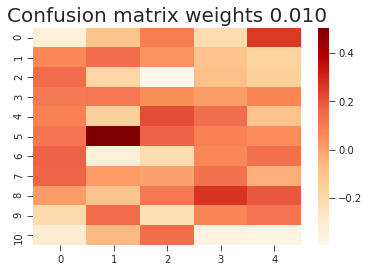

In [ ]:
ax = seaborn.heatmap(weights0001[:,0,:], cmap="OrRd")
ax.set_title('Confusion matrix weights $\lambda = 0.001$', fontsize=20)

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


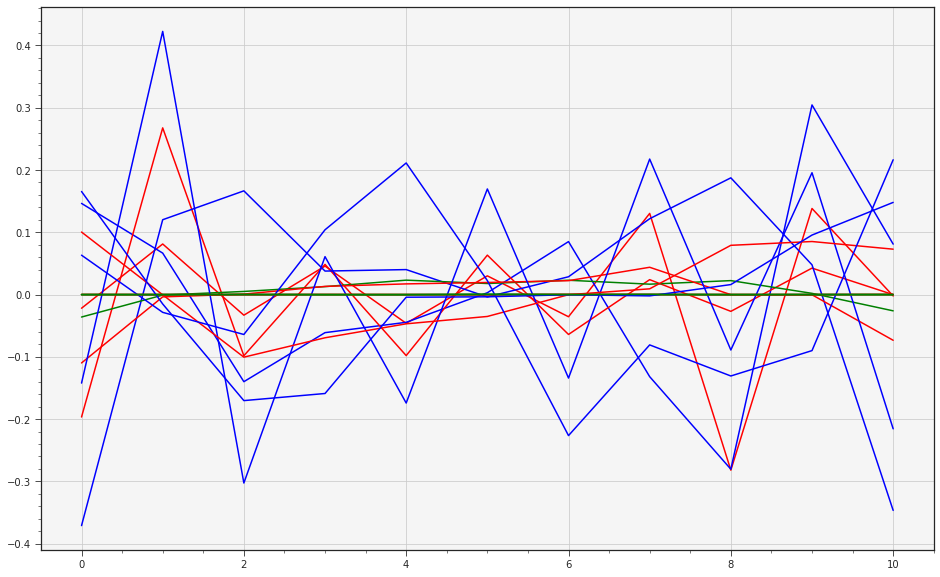

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks()
plt.minorticks_on()
plt.style.use('seaborn-ticks')
ax = plt.axes()
ax.set_facecolor("whitesmoke")

plt.plot(weights0010[:,0,0],'r')
plt.plot(weights0001[:,0,0],'b')
plt.plot(weights0020[:,0,0],'g')

plt.plot(weights0010[:,0,1],'r')
plt.plot(weights0001[:,0,1],'b')
plt.plot(weights0020[:,0,1],'g')

plt.plot(weights0010[:,0,2],'r')
plt.plot(weights0001[:,0,2],'b')
plt.plot(weights0020[:,0,2],'g')

plt.plot(weights0010[:,0,3],'r')
plt.plot(weights0001[:,0,3],'b')
plt.plot(weights0020[:,0,3],'g')

plt.plot(weights0010[:,0,4],'r')
plt.plot(weights0001[:,0,4],'b')
plt.plot(weights0020[:,0,4],'g')
plt.style.use('seaborn-ticks')
plt.xticks()
plt.minorticks_on()
ax = plt.axes()
plt.grid()
#plt.title("Mask dashed lines $\lambda=0.010$ full lines $\lambda=0.001$",fontsize=15)
plt.show()


/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


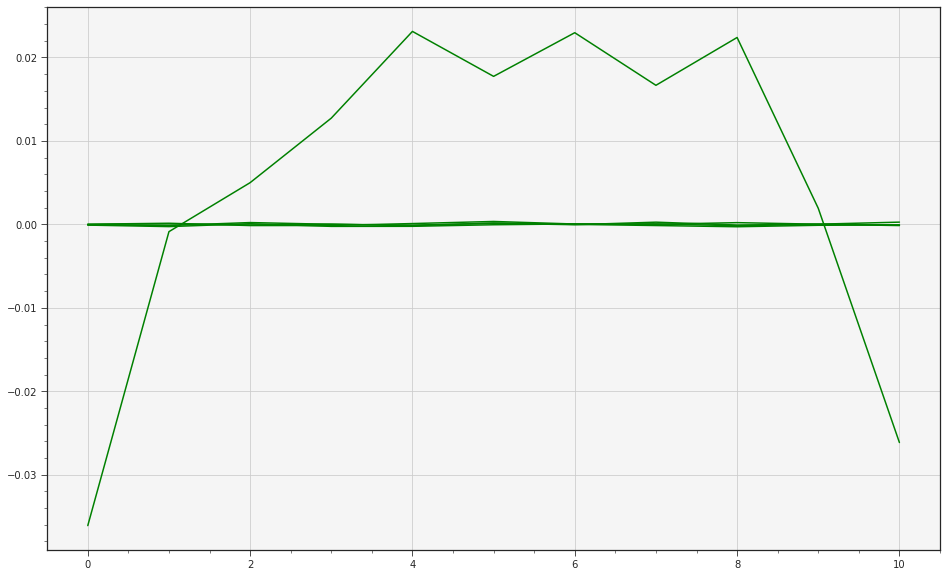

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks()
plt.minorticks_on()
plt.style.use('seaborn-ticks')
ax = plt.axes()
ax.set_facecolor("whitesmoke")

plt.plot(weights0020[:,0,0],'g')

plt.plot(weights0020[:,0,1],'g')

plt.plot(weights0020[:,0,2],'g')

plt.plot(weights0020[:,0,3],'g')

plt.plot(weights0020[:,0,4],'g')

plt.style.use('seaborn-ticks')
plt.xticks()
plt.minorticks_on()
ax = plt.axes()
plt.grid()
#plt.title("Mask $\lambda=0.020$",fontsize=15)
plt.show()

Looking at the second plot, we have understood that, if the model is bad (the model with $\lambda=0.020$), then all the value of the weights are very small compared to the one of a better model. So bigger weights seems to lead to better predictions.

Then we can understand the first plot, which is a comparison between two good model. The best model is the one with more amplitude of the weights. This is according to the previous plot of the ADAM accuracy/loss function.

## Conclusion
In the first part we have visualized the confusion matrix, which gives us informations about the predictions of our models. The best model is the one with the biggest trace of the confusion matrix.

In the second part we have reduced the signal-to-noise ratio, starting from $A/DX=10$. Since we have incremented the noise, at some point the models are not able anymore to gives us good prediction.

In the third part we have used the given data. We have trained the data on different CNN, made by just $1$ Conv1D layer and some Dense layers. We were able to understand that adding Dense layers make the number of parameters increase more quickly than reducing Conv1D layers. We have tried different architecture keeping the number of trainable parameters at most $600$.

In the fourth part we have tried different $\lambda$ value of the regularization L1. We have seen that the models are very similar each others, a part from $\lambda=0.020$ which make the model fails in the task. The same stuff was tried with the regularization L2 and the results were similar (we didn't put it in the notebook). The performance of the network are pretty good with the value of $\lambda$ we have used in all the previous point. At this point, we have tried to visualize the weights and the mask of the models. We have started visualizing the one of the worst model, which are very small compared with the others. So we deduced that smaller weights means worst model. Then we have compared the weights of two good models.  


## Appendix part 2

### DX = 53
### A/DX = 9.43

In [ ]:
str0 = 'ts_L60_Z12_A500_DX53_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n] - xm[n]
    
xstd = x.std(axis = 1)
for n in range(N):
    x[n] = x[n] / xstd[n]
    
categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L1_53 = np.array((fit.history["accuracy"],
                       fit.history['val_' + "accuracy"],
                       fit.history["loss"], fit.history['val_' + "loss"]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_4 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_4 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L1_53 = np.array((fit1.history["accuracy"],
                      fit1.history['val_' + "accuracy"],
                      fit1.history["loss"], fit1.history['val_' + "loss"]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_5 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_5 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L2_53 = np.array((fit3.history["accuracy"], 
                       fit3.history['val_' + "accuracy"],
                       fit3.history["loss"], fit3.history['val_' + "loss"]))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_6 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_6 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L2_53 = np.array((fit4.history["accuracy"],
                      fit4.history['val_' + "accuracy"],
                      fit4.history["loss"], fit4.history['val_' + "loss"]))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_7 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_7 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


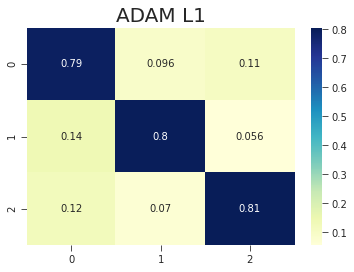

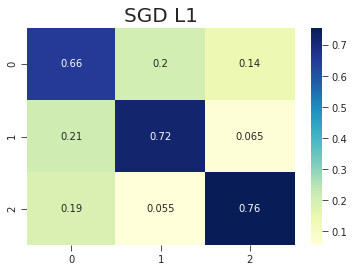

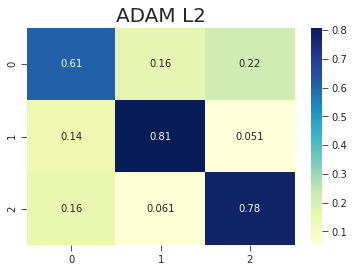

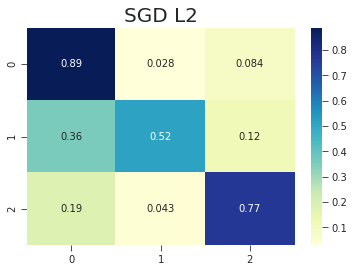

In [ ]:
y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()

In [ ]:
print("Adam L1 = ",confusion_matrix.trace())
print("SGD L1 = ",confusion_matrix1.trace())
print("Adam L2 = ",confusion_matrix3.trace())
print("SGD L2 = ",confusion_matrix4.trace())
trace_adam_l1[1] = confusion_matrix.trace()
trace_sgd_l1[1]  = confusion_matrix1.trace()
trace_adam_l2[1] = confusion_matrix3.trace()
trace_sgd_l2[1]  = confusion_matrix4.trace()

Adam L1 =  2.400002701352027
SGD L1 =  2.1345183264223744
Adam L2 =  2.205109157133145
SGD L2 =  2.1761889325607466


### DX = 55
### A/DX = 9.09

In [ ]:
str0 = 'ts_L60_Z12_A500_DX55_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n] 
    
xstd = x.std(axis = 1) 
for n in range(N):
    x[n] = x[n] / xstd[n]

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L1_55 = np.array((fit.history["accuracy"], 
                       fit.history['val_' + "accuracy"],
                       fit.history["loss"], fit.history['val_' + "loss"]))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_8 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_8 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L1_55 = np.array((fit1.history["accuracy"],
                      fit1.history['val_' + "accuracy"],
                      fit1.history["loss"], fit1.history['val_' + "loss"]))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_9 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_9 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L2_55 = np.array((fit3.history["accuracy"],
                       fit3.history['val_' + "accuracy"], 
                       fit3.history["loss"], fit3.history['val_' + "loss"]))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_10 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_10 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)               

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L2_55 = np.array((fit4.history["accuracy"], 
                      fit4.history['val_' + "accuracy"],
                      fit4.history["loss"], fit4.history['val_' + "loss"]))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_11 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_11 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


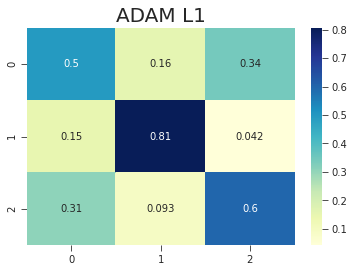

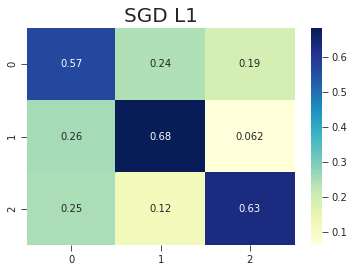

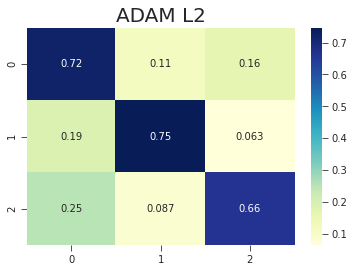

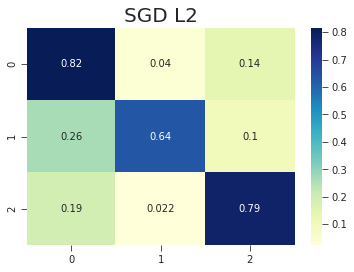

In [ ]:
y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()

In [ ]:
print("Adam L1 = ",confusion_matrix.trace())
print("SGD L1 = ",confusion_matrix1.trace())
print("Adam L2 = ",confusion_matrix3.trace())
print("SGD L2 = ",confusion_matrix4.trace())
trace_adam_l1[2] = confusion_matrix.trace()
trace_sgd_l1[2]  = confusion_matrix1.trace()
trace_adam_l2[2] = confusion_matrix3.trace()
trace_sgd_l2[2]  = confusion_matrix4.trace()

Adam L1 =  1.9007590799194998
SGD L1 =  1.8825834830332582
Adam L2 =  2.1285550918234577
SGD L2 =  2.236334535434985


### DX = 57
### A/DX = 8.77

In [ ]:
str0 = 'ts_L60_Z12_A500_DX57_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)


xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n] 
    
xstd = x.std(axis = 1) 
for n in range(N):
    x[n] = x[n] / xstd[n]

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L1_57 = np.array((fit.history["accuracy"],
                       fit.history['val_' + "accuracy"], 
                       fit.history["loss"], fit.history['val_' + "loss"]))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_12 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_12 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)               

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L1_57 = np.array((fit1.history["accuracy"], 
                      fit1.history['val_' + "accuracy"], 
                      fit1.history["loss"], fit1.history['val_' + "loss"]))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_13 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_13 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)               

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L2_57 = np.array((fit3.history["accuracy"],
                       fit3.history['val_' + "accuracy"],
                       fit3.history["loss"], fit3.history['val_' + "loss"]))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_14 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_14 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 3)               

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L2_57 = np.array((fit4.history["accuracy"],
                      fit4.history['val_' + "accuracy"], 
                      fit4.history["loss"], fit4.history['val_' + "loss"]))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_15 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_15 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 3)               

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


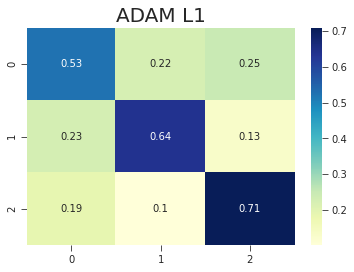

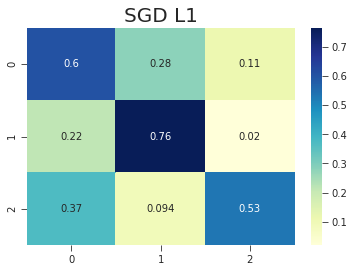

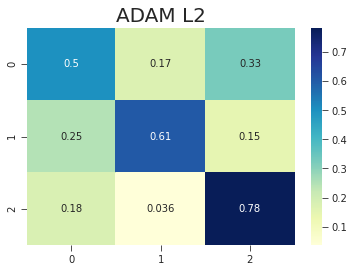

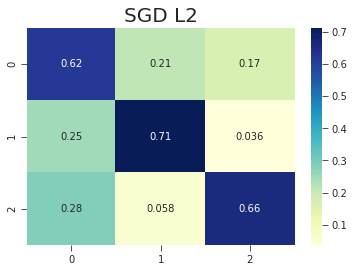

In [ ]:
y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()

In [ ]:
print("Adam L1 = ",confusion_matrix.trace())
print("SGD L1 = ",confusion_matrix1.trace())
print("Adam L2 = ",confusion_matrix3.trace())
print("SGD L2 = ",confusion_matrix4.trace())
trace_adam_l1[3] = confusion_matrix.trace()
trace_sgd_l1[3]  = confusion_matrix1.trace()
trace_adam_l2[3] = confusion_matrix3.trace()
trace_sgd_l2[3]  = confusion_matrix4.trace()

Adam L1 =  1.8750196973585278
SGD L1 =  1.9006960483722102
Adam L2 =  1.888463425944685
SGD L2 =  1.9860745303024163


### DX=60
### A/DX = 8.33

In [ ]:
str0 = 'ts_L60_Z12_A500_DX60_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n]
    
xstd = x.std(axis = 1) 
for n in range(N):
    x[n] = x[n] / xstd[n]

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L1_60 = np.array((fit.history["accuracy"],
                       fit.history['val_' + "accuracy"], 
                       fit.history["loss"], fit.history['val_' + "loss"]))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_16 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_16 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_16 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 3)               

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L1_60 = np.array((fit1.history["accuracy"],
                      fit1.history['val_' + "accuracy"],
                      fit1.history["loss"], fit1.history['val_' + "loss"]))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_17 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_17 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 3)               

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L2_60 = np.array((fit3.history["accuracy"], 
                       fit3.history['val_' + "accuracy"],
                       fit3.history["loss"], fit3.history['val_' + "loss"]))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_18 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_18 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_18 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 3)               

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L2_60 = np.array((fit4.history["accuracy"], 
                      fit4.history['val_' + "accuracy"],
                      fit4.history["loss"], fit4.history['val_' + "loss"]))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_19 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_19 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_19 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 3)               

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


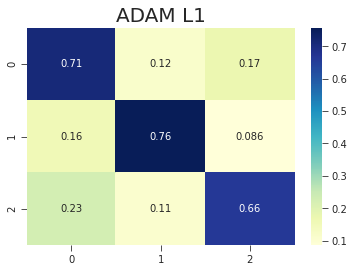

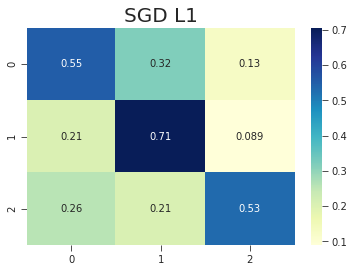

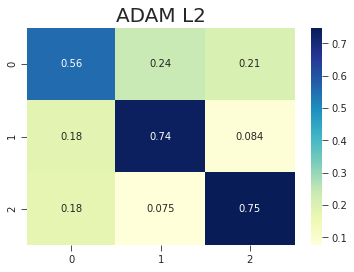

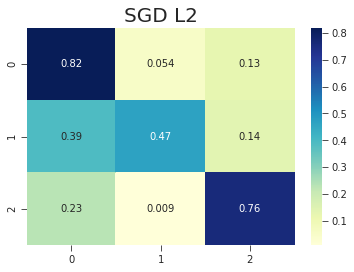

In [ ]:
y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()

In [ ]:
print("Adam L1 = ",confusion_matrix.trace())
print("SGD L1 = ",confusion_matrix1.trace())
print("Adam L2 = ",confusion_matrix3.trace())
print("SGD L2 = ",confusion_matrix4.trace())
trace_adam_l1[4] = confusion_matrix.trace()
trace_sgd_l1[4]  = confusion_matrix1.trace()
trace_adam_l2[4] = confusion_matrix3.trace()
trace_sgd_l2[4]  = confusion_matrix4.trace()

Adam L1 =  2.1300701000850926
SGD L1 =  1.7911629770700235
Adam L2 =  2.0400835618226925
SGD L2 =  2.0471791131461297


### DX=70
### A/DX = 7.14

In [ ]:
str0 = 'ts_L60_Z12_A500_DX70_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n] 

xstd = x.std(axis = 1) 
for n in range(N):
    x[n] = x[n] / xstd[n]

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L1_70 = np.array((fit.history["accuracy"],
                       fit.history['val_' + "accuracy"],
                       fit.history["loss"], fit.history['val_' + "loss"]))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_20 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_20 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_20 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 3)               

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L1_70 = np.array((fit1.history["accuracy"],
                      fit1.history['val_' + "accuracy"],
                      fit1.history["loss"], fit1.history['val_' + "loss"]))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_21 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_21 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_21 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 3)               

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

ADAM_L2_70 = np.array((fit3.history["accuracy"],
                      fit3.history['val_' + "accuracy"],
                      fit3.history["loss"], fit3.history['val_' + "loss"]))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_22 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_22 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_22 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 3)               

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

SGD_L2_70 = np.array((fit4.history["accuracy"],
                       fit4.history['val_' + "accuracy"],
                       fit4.history["loss"], fit4.history['val_' + "loss"]))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_23 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_23 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_23 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 3)               

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


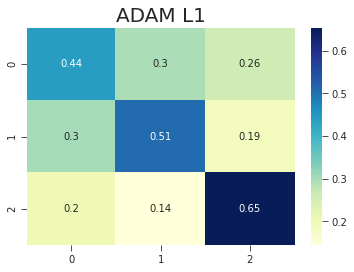

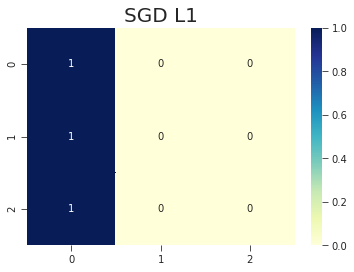

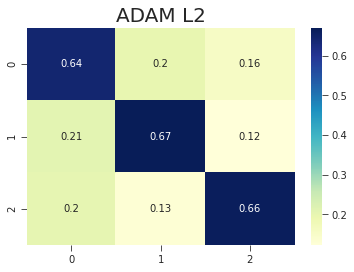

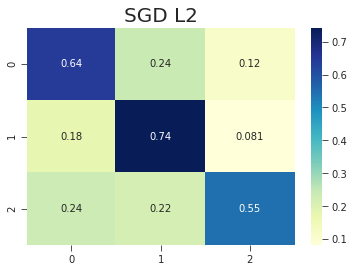

In [ ]:
y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()


In [ ]:
print("Adam L1 = ",confusion_matrix.trace())
print("SGD L1 = ",confusion_matrix1.trace())
print("Adam L2 = ",confusion_matrix3.trace())
print("SGD L2 = ",confusion_matrix4.trace())
trace_adam_l1[5] = confusion_matrix.trace()
trace_sgd_l1[5]  = confusion_matrix1.trace()
trace_adam_l2[5] = confusion_matrix3.trace()
trace_sgd_l2[5]  = confusion_matrix4.trace()

Adam L1 =  1.6064602833718276
SGD L1 =  1.0
Adam L2 =  1.9770159965062515
SGD L2 =  1.932146539342941


## Appendix part 4

### Convolutional NN

In [ ]:
str0 = 'ts_comp_N10000'
fnamex = 'DATA2/x_' + str0 + '.csv'
fnamey = 'DATA2/y_' + str0 + '.csv'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n] - xm[n] 
xstd = x.std(axis = 1)
for n in range(N):
    x[n] = x[n] / xstd[n]

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


### DATA reshaping

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


### Convolutional NN

$\lambda=0.010$.

In [ ]:
reg = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(reg,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

REG_L1_0010 = np.array((fit.history["accuracy"],
                       fit.history['val_' + "accuracy"],
                       fit.history["loss"], fit.history['val_' + "loss"]))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

$\lambda=0.001$.

In [ ]:
np.random.seed(12345)
reg1 = regularizers.l1(0.001)

model1 = create_model(reg1,ini)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

REG_L1_0001 = np.array((fit1.history["accuracy"],
                       fit1.history['val_' + "accuracy"],
                       fit1.history["loss"], fit1.history['val_' + "loss"]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

$\lambda=0.008$.

In [ ]:
reg3 = regularizers.l1(0.008)
np.random.seed(12345)

model3 = create_model(reg3,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

REG_L1_0008 = np.array((fit3.history["accuracy"],
                       fit3.history['val_' + "accuracy"],
                       fit3.history["loss"], fit3.history['val_' + "loss"]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_2 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

$\lambda=0.020$.

In [ ]:
np.random.seed(12345)
reg4 = regularizers.l1(0.05)
model4 = create_model(reg4,ini)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

REG_L1_0020 = np.array((fit4.history["accuracy"],
                       fit4.history['val_' + "accuracy"],
                       fit4.history["loss"], fit4.history['val_' + "loss"]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_3 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_3 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

$\lambda=0.009$.

In [ ]:
np.random.seed(12345)
reg5 = regularizers.l1(0.009)
model5 = create_model(reg5,ini)

fit5 = model5.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

REG_L1_0009 = np.array((fit5.history["accuracy"],
                       fit5.history['val_' + "accuracy"],
                       fit5.history["loss"], fit5.history['val_' + "loss"]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_4 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_4 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [ ]:
weights0010,_ = model.layers[0].get_weights()
weights0001,_= model1.layers[0].get_weights()
weights0020,_ = model4.layers[0].get_weights()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe671672-af6a-4685-87e3-e4b820a4c76e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>